## 第79讲 使用OpenCV对(脸部)图像模糊处理


## Python学习：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

## Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode

In [1]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [2]:
import cv2
cv2.__version__

'4.3.0'

## (1) cv2.blur()

In [45]:
import cv2

img = cv2.imread('Lesson75-OpenCV/image_examples/Lesson75-team.jpg')

#blur = cv2.blur(img,(5,5))

while True:
    cv2.imshow('img',img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

In [49]:
import cv2

img = cv2.imread('Lesson75-OpenCV/image_examples/Lesson75-team.jpg')

blur = cv2.blur(img,(35,35))

while True:
    cv2.imshow('img',blur)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

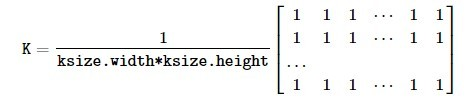

In [5]:
from IPython.display import Image
Image(filename='Lesson79-ksize.jpg')

## (2) cv2.GaussianBlur

In [67]:
import cv2

img = cv2.imread('Lesson75-OpenCV/image_examples/Lesson75-team.jpg')

blur = cv2.GaussianBlur(img,(27,27),0)

while True:
    cv2.imshow('img',blur)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

In [68]:
import numpy as np
import cv2
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows

face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

#img = cv2.imread('Lesson75-OpenCV/image_examples/obama.jpg')
#img = cv2.imread('Lesson75-OpenCV/image_examples/Trump.jpg')
img = cv2.imread('Lesson75-OpenCV/image_examples/Lesson75-team.jpg')
#img = cv2.imread('D:/python/Project0-Python-MachineLearning/Lesson74-Monkey.jpg')
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)

    #roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    detectedFace = cv2.GaussianBlur(roi_color, ksize, 0)
    img[y:y+h, x:x+w] = detectedFace
    #eyes = eye_classifier.detectMultiScale(roi_gray)
    #for (ex,ey,ew,eh) in eyes:
    #    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
imshow('img',img)
waitKey(0)
destroyAllWindows()

In [69]:
import cv2
from mtcnn import MTCNN

ksize = (125, 125)
font = cv2.FONT_HERSHEY_SIMPLEX


def find_face_MTCNN(color, result_list):
    for result in result_list:
        x, y, w, h = result['box']
        roi = color[y:y+h, x:x+w]
        cv2.rectangle(color,
                      (x, y), (x+w, y+h),
                      (0, 155, 255),
                      5)
        detectedFace = cv2.GaussianBlur(roi, ksize, 0)
        color[y:y+h, x:x+w] = detectedFace
    return color


video_capture = cv2.VideoCapture(0, cv2.CAP_DSHOW)
detector = MTCNN()

while True:
    _, color = video_capture.read()
    faces = detector.detect_faces(color)
    detectFaceMTCNN = find_face_MTCNN(color, faces)
    cv2.imshow('Video', detectFaceMTCNN)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

## (3) cv2.medianBlur

In [62]:
import cv2

img = cv2.imread('Lesson75-OpenCV/image_examples/Lesson75-team.jpg')

blur = cv2.medianBlur(img,5)

while True:
    cv2.imshow('img',blur)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

## (4) cv2.bilateralFilter

In [64]:
import cv2

img = cv2.imread('Lesson75-OpenCV/image_examples/Lesson75-team.jpg')

blur = cv2.bilateralFilter(img,9,175,175)

while True:
    cv2.imshow('img',blur)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()